# Logistic Regression

### Load the penguin dataset into pandas

In [1]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('data/penguins_simple.csv', sep=';')
df.head(3)

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE


### Create a scatterplot of the culmen length vs width (culmen means "beak")

In [4]:
df['Species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: Species, dtype: int64

In [5]:
color = ['blue'] * 146 + ['purple'] * 68 + ['pink'] * 119

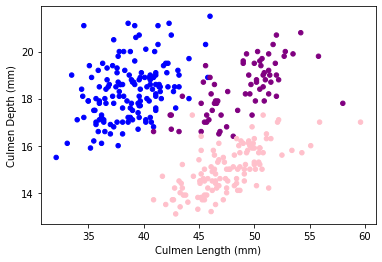

In [6]:
df.plot(x='Culmen Length (mm)', y='Culmen Depth (mm)', kind='scatter', c=color)
# 'c' argument must be a color, a sequence of colors, or a sequence of numbers,

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>

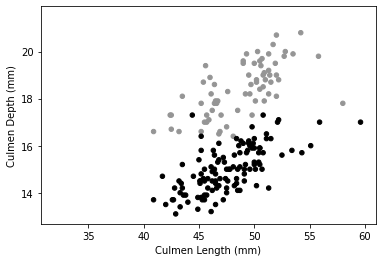

In [33]:
df.plot(x='Culmen Length (mm)', y='Culmen Depth (mm)', kind='scatter', c=pd.factorize(df['Species'])[0])

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>

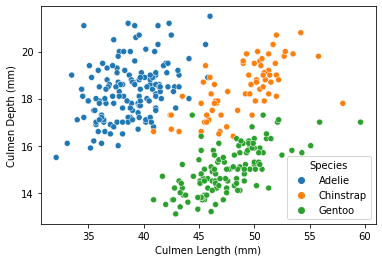

In [35]:
sns.scatterplot(data=df, x='Culmen Length (mm)', y='Culmen Depth (mm)', hue='Species')

### Create a barplot of the three species frequencies

<AxesSubplot:>

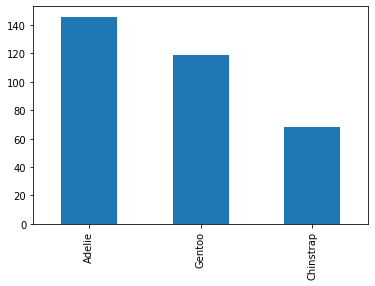

In [37]:
df['Species'].value_counts().plot(kind='bar')

### Create a histogram of the body mass

<AxesSubplot:ylabel='Frequency'>

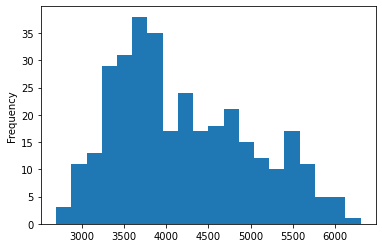

In [43]:
df['Body Mass (g)'].plot(kind='hist', bins=20)

### Remove all Chinstrap penguins (although they are cute :wink: )

In [45]:
df2 = df[df['Species'].isin(['Adelie', 'Gentoo'])]

In [54]:
df3 = df.drop(df[df['Species'] == 'Chinstrap'].index)  # could take inplace=True

In [55]:
df4 = df[df['Species'] != 'Chinstrap']

In [56]:
df4.shape

(265, 6)

### Logistic Regression

**Task: predict the species (a category) from the beak (2 features or variables)**

* Culmen length + depth are **independent variables**
* Species is a **dependent variable**

In [62]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'dividing penguins with a decision boundary')

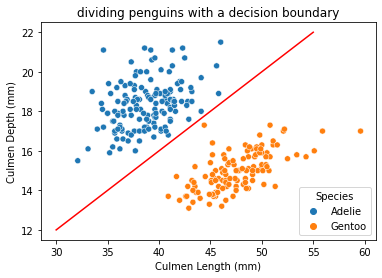

In [71]:
sns.scatterplot(data=df4, x='Culmen Length (mm)', y='Culmen Depth (mm)', hue='Species')
plt.plot([30, 55], [12, 22], color='r')
plt.title('dividing penguins with a decision boundary')

* with 3 features (independent variables), the decision boundary is a plane (2d)
* with 4+ features (independent variables), the decision boundary is a hyperplane (3+ dimensions)

### Requirements (or assumptions)

* **features are numbers**
* features are statistically independent (no correlation)

If there is strong correlation: 
* we can't interpret the model parameters easily (p-values)
* we need to constrain the model (regularize)

In [73]:
import math

In [83]:
x = 1.23
1 / (1 + math.e ** (-x))

0.7738185742694538

In [113]:
X = df4[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Body Mass (g)']] # input data, independent vars
y = df4['Species']                                   # target data, dependent var

In [114]:
X.shape, y.shape

((265, 3), (265,))

In [115]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [116]:
Xtrain, Xtest, ytrain, ytest = tts(X, y, random_state=42)

In [117]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((198, 3), (67, 3), (198,), (67,))

In [118]:
model = LogisticRegression()
model.fit(Xtrain, ytrain)    # trains the model

LogisticRegression()

In [119]:
model.coef_

array([[ 0.53671637, -1.55585892,  0.00505203]])

In [120]:
model.intercept_

array([-19.80306277])

In [121]:
ypred = model.predict(Xtrain)

### Evaluate the prediction quality

In [122]:
accuracy_score(ytrain, ypred) # --> proportion of correct predictions

1.0

In [123]:
# evaluate on the test set
ypred_test = model.predict(Xtest)
accuracy_score(ytest, ypred_test)

1.0

### Improvements:

* calculate probabilities
* plot a decision boundary (2 features)
* look at p-values and confidence intervals of your coefficients (`statsmodels`)

In [124]:
prob = model.predict_proba(Xtest)
prob[:10]

array([[7.18435395e-05, 9.99928156e-01],
       [9.99996927e-01, 3.07328352e-06],
       [9.99867343e-01, 1.32657226e-04],
       [9.99456137e-01, 5.43863061e-04],
       [9.99992735e-01, 7.26545574e-06],
       [9.99927059e-01, 7.29414530e-05],
       [3.27049126e-02, 9.67295087e-01],
       [9.97433764e-01, 2.56623606e-03],
       [1.47421011e-01, 8.52578989e-01],
       [9.99858204e-01, 1.41796307e-04]])